In [ ]:
!pip install -q google-cloud-bigquery

In [1]:
from google.cloud import bigquery
from google.colab import auth
import pandas as pd

In [22]:
auth.authenticate_user()

In [23]:
client = bigquery.Client(project='impactofremotework')

query = """
    SELECT *
    FROM `newremotework.newremotework_updated`
"""

query_job = client.query(query)
df = query_job.to_dataframe()
df.head()

,Stress_Level,Mental_Health_Condition,Sleep_Quality,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Region
0,1,2,2,EMP3857,36,Prefer not to say,Project Manager,IT,17,Remote,27,12,4,True,Decrease,3,Neutral,4,None,Europe
1,1,3,3,EMP1744,25,Non-binary,Marketing,Finance,22,Onsite,29,0,3,True,Decrease,4,Unsatisfied,2,None,Asia
2,3,1,1,EMP2996,51,Male,Marketing,Education,22,Hybrid,27,4,5,False,Decrease,5,Satisfied,2,None,South America
3,2,3,1,EMP3349,40,Male,Project Manager,Education,30,Remote,44,9,5,True,Decrease,2,Neutral,2,None,Oceania
4,1,4,3,EMP4711,43,Male,Sales,Education,32,Onsite,35,6,5,True,Decrease,1,Satisfied,3,None,Europe


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df['Physical_Activity'] = df['Physical_Activity'].map({
    'Weekly': 3,
    'Daily': 2,
    'None': 1
})

df['Satisfaction_with_Remote_Work'] = df['Satisfaction_with_Remote_Work'].map({
    'Unsatisfied': 1,
    'Neutral': 2,
    'Satisfied': 3
})

X = df[['Stress_Level', 'Sleep_Quality', 'Work_Life_Balance_Rating',
        'Number_of_Virtual_Meetings', 'Physical_Activity',
        'Access_to_Mental_Health_Resources']]

y = df['Satisfaction_with_Remote_Work']

print(df.isnull().sum())

Stress_Level                         0
Mental_Health_Condition              0
Sleep_Quality                        0
Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Region                               0
dtype: int64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.6999231229654309
R-squared: -0.0013335264194112018


<ipython-input-28-2f9b28b4e851>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='red')  # Line of perfect fit


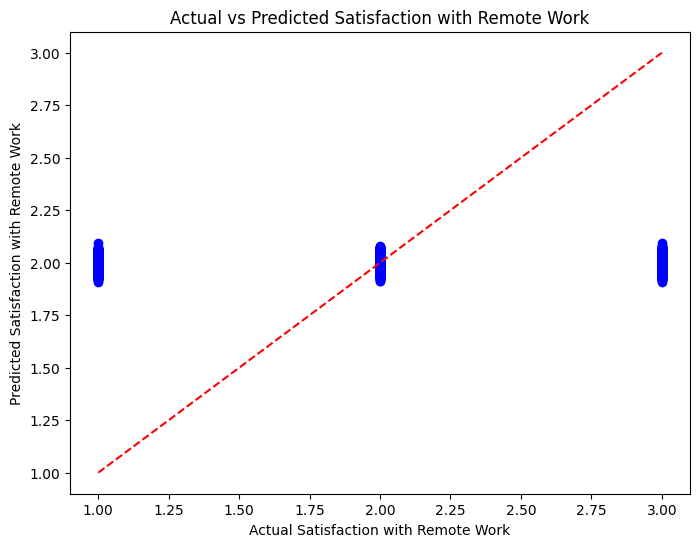

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='red')  # Line of perfect fit
plt.xlabel('Actual Satisfaction with Remote Work')
plt.ylabel('Predicted Satisfaction with Remote Work')
plt.title('Actual vs Predicted Satisfaction with Remote Work')
plt.show()

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

label_encoders = {}
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Productivity_Change',
                       'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Region']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Access_to_Mental_Health_Resources'] = df['Access_to_Mental_Health_Resources'].astype(int)
X = df.drop(['Employee_ID', 'Productivity_Change'], axis=1)
y = df['Productivity_Change']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.345
Confusion Matrix:
[[169  72 106]
 [138  63 105]
 [147  87 113]]
